In [37]:
import os
import pandas as pd
import json
import zipfile
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gzip
import numpy as np
import glob
user = os.getenv("USERNAME")
path = (r"C:\Users\{}\OneDrive\Desktop\VS Code\python\data".format(user))

In [2]:
dir = os.listdir(path)[0]



In [3]:
data_path = os.path.join(path, dir)

In [5]:
files = zipfile.ZipFile(data_path).infolist()

In [43]:
data_frames = {}

for zip_file in glob.glob(data_path):
    zf = zipfile.ZipFile(zip_file)
    dfs = [pd.read_csv(zf.open(f), header=None, sep=";") for f in zf.namelist()]
    data_frames[zf.filename] = dfs


In [51]:
for zip_file in glob.glob(data_path):
    zf = zipfile.ZipFile(zip_file)
    dfs = [pd.read_csv(zf.open(f), header=None, sep=";") for f in zf.namelist()]
    df = pd.concat(dfs,ignore_index=True)
    print(df)

                                                       0
0      CONTROL,TOTROOMS,PERPOVLVL,JACPRIMARY,JACSECND...
1      '21030112',9,188,'0','0','2','0','0','0','0','...
2      '21030114',7,501,'0','0','2','0','0','0','0','...
3      '21030116',4,269,'0','0','2','0','0','0','0','...
4      '21030118',7,501,'0','0','2','0','0','0','0','...
...                                                  ...
92773  '21063599','0','0','2','0','0','0','0','12','2...
92774  '21063599','0','0','2','0','0','0','0','36','1...
92775  '21063605','0','0','0','0','0','0','0','24','2...
92776  '21063605','0','0','0','0','0','0','0','35','2...
92777  '21063605','0','0','0','0','0','0','0','37','1...

[92778 rows x 1 columns]


In [75]:
# Remove top and bottom 10%
low, high = df['FTOTINC'].quantile([0.1, 0.9])
mask_area = df['FTOTINC'].between(low, high)
y = df[mask_area]

In [76]:
df_one = pd.merge(y, states_df, left_on = "STATEFIP", right_on = "code", how = "left")

In [77]:
df_one['FTOTINC'].quantile([0.1, 0.9])

0.1     24600.0
0.9    146500.0
Name: FTOTINC, dtype: float64

In [78]:
df_one['FTOTINC'].mean()


76296.24387024429

In [79]:
df_one['FTOTINC'].median()

65100.0

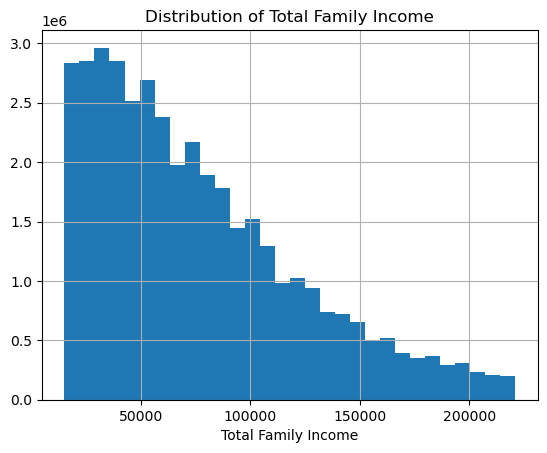

In [81]:
df_one['FTOTINC'].hist(bins = 30);
plt.xlabel("Total Family Income");
plt.title("Distribution of Total Family Income");

In [85]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39611081 entries, 0 to 39611080
Data columns (total 30 columns):
 #   Column     Dtype  
---  ------     -----  
 0   YEAR       int64  
 1   SAMPLE     int64  
 2   SERIAL     int64  
 3   CBSERIAL   int64  
 4   HHWT       float64
 5   CLUSTER    int64  
 6   STATEFIP   int64  
 7   STRATA     int64  
 8   GQ         int64  
 9   TAXINCL    int64  
 10  PERNUM     int64  
 11  PERWT      float64
 12  SEX        int64  
 13  AGE        int64  
 14  RACE       int64  
 15  RACED      int64  
 16  EDUC       int64  
 17  EDUCD      int64  
 18  EMPSTAT    int64  
 19  EMPSTATD   int64  
 20  OCC        int64  
 21  IND        int64  
 22  FTOTINC    int64  
 23  INCWAGE    int64  
 24  MIGRATE1   int64  
 25  MIGRATE1D  int64  
 26  VETSTAT    int64  
 27  VETSTATD   int64  
 28  code       int64  
 29  state      object 
dtypes: float64(2), int64(27), object(1)
memory usage: 9.1+ GB


In [33]:
vet_stat = {
    0: "N/A",
    1: "Not a veteran",
    2: "Veteran",
    3: "Unknown"
}

df_one['VETSTAT'] = df_one['VETSTAT'].replace(vet_stat)

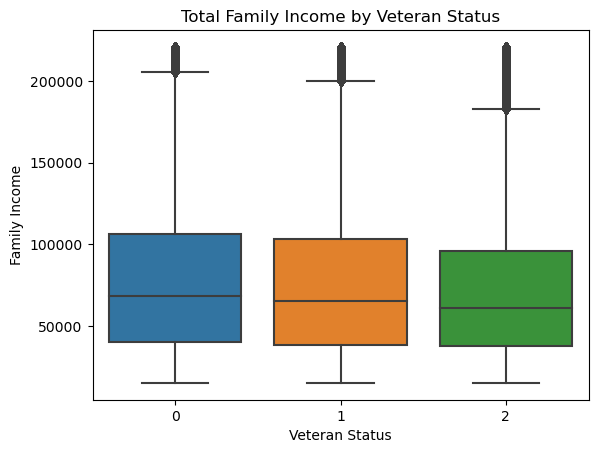

In [82]:
sns.boxplot(x = "VETSTAT", y = "FTOTINC", data = df_one);
plt.xlabel("Veteran Status")
plt.ylabel("Family Income")
plt.title("Total Family Income by Veteran Status");

In [83]:
low, high = df_one["INCWAGE"].quantile([0.0, 0.8])
mask_area = df_one["INCWAGE"].between(low, high)
subset_one = df_one["INCWAGE"] > 10_000
df_two = df_one[mask_area & subset_one]

In [70]:
df_two["INCWAGE"].describe()

count    1.697066e+07
mean     4.669768e+04
std      2.867319e+04
min      1.010000e+04
25%      2.500000e+04
50%      4.000000e+04
75%      6.000000e+04
max      1.500000e+05
Name: INCWAGE, dtype: float64

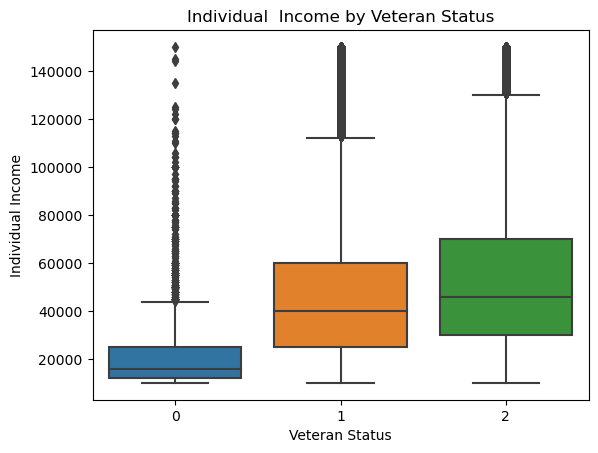

In [84]:
sns.boxplot(x = "VETSTAT", y = "INCWAGE", data = df_two);
plt.xlabel("Veteran Status")
plt.ylabel("Individual Income")
plt.title("Individual  Income by Veteran Status");

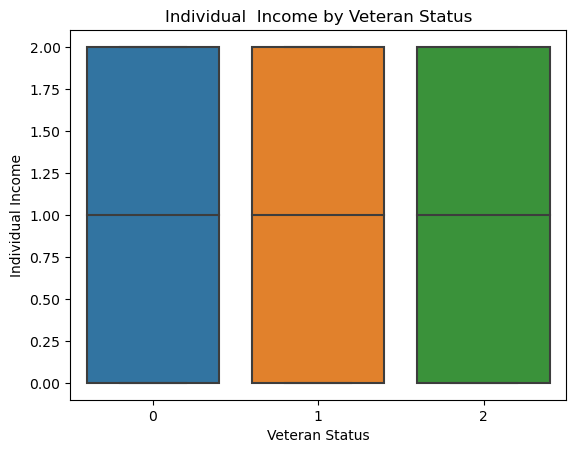

In [86]:
sns.boxplot(x = "VETSTAT", y = "TAXINCL", data = df_two);
plt.xlabel("Veteran Status")
plt.ylabel("Individual Income")
plt.title("Individual  Income by Veteran Status");

In [88]:
df_two['TAXINCL'].median()

1.0